# Importação de Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import joblib

# Carregamento do Dataset

In [2]:
df = pd.read_csv("datasets/PhiUSIIL_Phishing_URL_Dataset.csv")
df.head(5)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


# Verificar a Distribuição dos Dados e Estatísticas

In [3]:

df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

# Cálculo da Porcentagem de Valores Nulos


In [5]:

equacao = (df.isnull().sum() / len(df)) * 100
print(equacao)

FILENAME                      0.0
URL                           0.0
URLLength                     0.0
Domain                        0.0
DomainLength                  0.0
IsDomainIP                    0.0
TLD                           0.0
URLSimilarityIndex            0.0
CharContinuationRate          0.0
TLDLegitimateProb             0.0
URLCharProb                   0.0
TLDLength                     0.0
NoOfSubDomain                 0.0
HasObfuscation                0.0
NoOfObfuscatedChar            0.0
ObfuscationRatio              0.0
NoOfLettersInURL              0.0
LetterRatioInURL              0.0
NoOfDegitsInURL               0.0
DegitRatioInURL               0.0
NoOfEqualsInURL               0.0
NoOfQMarkInURL                0.0
NoOfAmpersandInURL            0.0
NoOfOtherSpecialCharsInURL    0.0
SpacialCharRatioInURL         0.0
IsHTTPS                       0.0
LineOfCode                    0.0
LargestLineLength             0.0
HasTitle                      0.0
Title         

# Filtrando Dados do tipo Objetct , Floot e Int

In [11]:
def dadosObjects(df):
    # Verifica se algum dado no DataFrame é do tipo 'object'
    if any(df.dtypes == 'object'):
        print("Existem colunas do tipo 'object':")
        print(df.dtypes[df.dtypes == 'object'])
    else:
        print("Não há colunas do tipo 'object'.")

def dadosfloots(df):
    df_float = df.dtypes[df.dtypes == 'float64']
    for i in range(len(df.columns)):
        if df.dtypes[df.columns[i]] == 'float64':
            print("Existem colunas do tipo 'float64':")
            print(df_float)

def dadosints(df):
    df_int = df.dtypes[df.dtypes == 'int64']
    for i in range(len(df.columns)):
        if df.dtypes[df.columns[i]] == 'int64':
            print("Existem colunas do tipo 'float64':")
            print(df_int)


In [7]:
dadosObjects(df)
dadosfloots(df)
dadosints(df)

Existem colunas do tipo 'object':
FILENAME    object
URL         object
Domain      object
TLD         object
Title       object
dtype: object
Existem colunas do tipo 'float64':
URLSimilarityIndex       float64
CharContinuationRate     float64
TLDLegitimateProb        float64
URLCharProb              float64
ObfuscationRatio         float64
LetterRatioInURL         float64
DegitRatioInURL          float64
SpacialCharRatioInURL    float64
DomainTitleMatchScore    float64
URLTitleMatchScore       float64
dtype: object
Existem colunas do tipo 'float64':
URLSimilarityIndex       float64
CharContinuationRate     float64
TLDLegitimateProb        float64
URLCharProb              float64
ObfuscationRatio         float64
LetterRatioInURL         float64
DegitRatioInURL          float64
SpacialCharRatioInURL    float64
DomainTitleMatchScore    float64
URLTitleMatchScore       float64
dtype: object
Existem colunas do tipo 'float64':
URLSimilarityIndex       float64
CharContinuationRate     float6

# Definindo URL como minha única característica

In [12]:
df_url = df[['URL']]
print(df_url)

                                                      URL
0                        https://www.southbankmosaics.com
1                                https://www.uni-mainz.de
2                          https://www.voicefmradio.co.uk
3                             https://www.sfnmjournal.com
4                      https://www.rewildingargentina.org
...                                                   ...
235790                     https://www.skincareliving.com
235791                      https://www.winchester.gov.uk
235792                    https://www.nononsensedesign.be
235793  https://patient-cell-40f5.updatedlogmylogin.wo...
235794                 https://www.alternativefinland.com

[235795 rows x 1 columns]


# Separar Característica dos Rotulos

In [13]:
#Característica (X): Apenas a URL
x = df['URL'].values
# Rótulos (y): Diversos rótulos indicativos
y = df[['label']].values
# Verificar os primeiros valores
print(x[:5])
print(y[:5])


['https://www.southbankmosaics.com' 'https://www.uni-mainz.de'
 'https://www.voicefmradio.co.uk' 'https://www.sfnmjournal.com'
 'https://www.rewildingargentina.org']
[[1]
 [1]
 [1]
 [1]
 [1]]


# Transformar URLs em características numéricas

In [14]:

# Transformar URLs em características numéricas
from sklearn.tree import DecisionTreeClassifier


print("="*12, "Transformar URLs em características numéricas", "="*12)
vectorizer = TfidfVectorizer()
x_transformed = vectorizer.fit_transform(x)


# Dividir os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)

# Criar o classificador de Árvore de Decisão
tree_classifier = DecisionTreeClassifier(random_state=42)

# Treinar o classificador
tree_classifier.fit(x_train, y_train)

# Fazer previsões
y_pred = tree_classifier.predict(x_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')


============ Transformar URLs em características numéricas ============
Acurácia: 1.00



# Calcular a matriz de confusão

Matriz de Confusão:
[[19941   183]
 [   31 27004]]


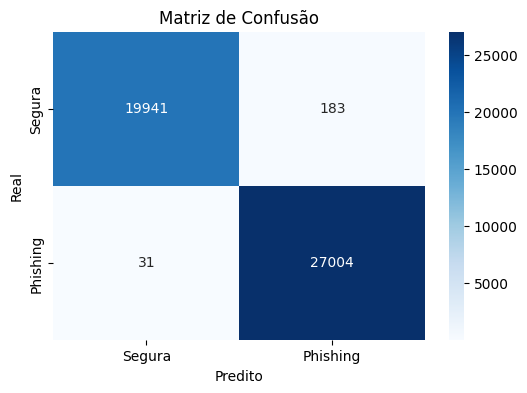

In [19]:

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Extrair os valores da matriz de confusão
VN = cm[0, 0]  # Verdadeiros Negativos
FP = cm[0, 1]  # Falsos Positivos
FN = cm[1, 0]  # Falsos Negativos
VP = cm[1, 1]  # Verdadeiros Positivos

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(cm)
# Visualizar a matriz de confusão usando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Segura', 'Phishing'], 
            yticklabels=['Segura', 'Phishing'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


### Exibir os valores extraídos

In [20]:
# Exibir os valores extraídos
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdadeiros Positivos (VP): {VP}")

Verdadeiros Negativos (VN): 19941
Falsos Positivos (FP): 183
Falsos Negativos (FN): 31
Verdadeiros Positivos (VP): 27004


# Análise da Matriz de Confusão

### Verdadeiros Negativos(VN)  - O modelo previu corretamente que a URL é segura.

### Falsos Positivos (FP) - O modelo previu que a URL era phishing, mas era segura.

### Falsos Negativos (FN) - O modelo previu que a URL era segura, mas era phishing.

### Verdadeiros Positivos (VP) - O modelo previu corretamente que a URL é phishing.

|        | Predito Segura | Predito Phishing |
|--------|----------------|------------------|
| **Real Segura**   | Verdadeiro Negativo (VN) | Falso Positivo (FP) |
| **Real Phishing** | Falso Negativo (FN)      | Verdadeiro Positivo (VP) |


# Métricas de Avaliação



### 1) Acurácia

    A acurácia mede a proporção de previsões corretas em relação ao total de previsões feitas. A fórmula é:

In [26]:
total = VN + FP + FN + VP
acuracia = (VN + VP) / total

print(f"Acurácia: {acuracia}")

Acurácia: 0.9954621599270553


### 2) Precisão

     A precisão mede a proporção de verdadeiros positivos em relação ao total de positivos previstos. A fórmula é:

In [27]:
precision = VP / (VP + FP)
print(f"Precisão: {precision}")

Precisão: 0.9932688417258249


### 3) Recal(Sensibilidade)

        O recall mede a proporção de verdadeiros positivos em relação ao total de positivos reais. A fórmula é:

In [25]:
recall = VP / (VP + FN)
print(f"Recall: {recall}")

Recall: 0.9988533382652117


#### 4) F1-Score

    O F1-score é a média harmônica entre precisão e recall, oferecendo uma única métrica que considera ambos. A fórmula é:

In [28]:
from sklearn.metrics import f1_score


f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00


In [29]:
path = r'C:\Users\Matheus\Documents\Estudos\Projetos com Python\DetectorPhishingNotebook\dump'
# Salvar o modelo e o vectorizer no diretório específico
joblib.dump(tree_classifier, f'{path}\\phishing_model.pkl')
joblib.dump(vectorizer, f'{path}\\vectorizer.pkl')

['C:\\Users\\Matheus\\Documents\\Estudos\\Projetos com Python\\DetectorPhishingNotebook\\dump\\vectorizer.pkl']

In [30]:
# Função para prever se uma URL é phishing
def predict_phishing(url):
    # Carregar o modelo e o vectorizer
    model = joblib.load(f'{path}\\phishing_model.pkl')
    vectorizer = joblib.load(f'{path}\\vectorizer.pkl')
    
    # Transformar a URL em características numéricas
    url_transformed = vectorizer.transform([url])
    
    # Fazer a previsão
    prediction = model.predict(url_transformed)
    return prediction[0]

input_url = ""
result = predict_phishing(input_url)
if result == 1:
    print("A URL é phishing.")
else:
    print("A URL é segura.")



A URL é segura.
